In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
from plotly import tools
import squarify
from matplotlib import cm


In [2]:
df_Match_By_Match=pd.read_csv('D:\EDA_Abhishek_Sachan\IPL Data Anaytics\IPL  Match By Match 2008-2022.csv',delimiter=';')

In [3]:
df_Match_By_Match.head(2)

,ID,Country,City,Seasons,Date,MatchNumber,Team1,Team2,Venue,TossWinner,...,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,India,Ahmedabad,IPL-2022,29/05/2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,...,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,India,Ahmedabad,IPL-2022,27/05/2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,...,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [4]:
df_Ball_By_ball=pd.read_csv('D:\EDA_Abhishek_Sachan\IPL Data Anaytics\IPL Ball by Ball 2008-2022.csv',delimiter=';')

In [5]:
df_Ball_By_ball.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Season,6's,4's
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,IPL-2022,0,0
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,IPL-2022,0,0
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,IPL-2022,0,0
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,IPL-2022,0,0
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,IPL-2022,0,0


# Top 10 MOM player In All seasons



In [6]:
player_name=df_Match_By_Match['Player_of_Match'].value_counts().index
player_MOM=df_Match_By_Match['Player_of_Match'].value_counts().values

C:\Users\Mahima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



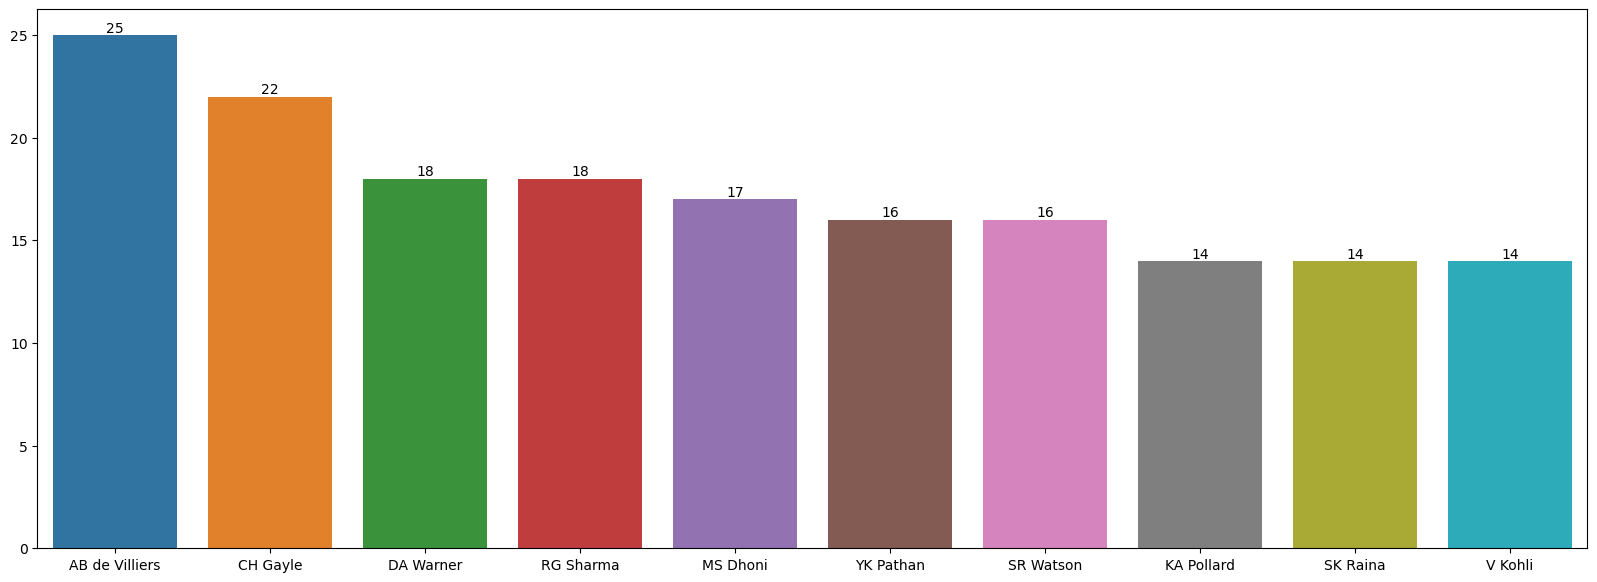

In [7]:
plt.rcParams["figure.figsize"] = (20,7)

ax=sns.barplot(player_name[0:10],player_MOM[0:10])
for i in ax.containers:
    ax.bar_label(i,)

# Matches_played In Each Season

In [8]:
Matches_played=df_Match_By_Match.groupby(['Seasons'])['ID'].count().reset_index().rename(columns={'ID':'Matches'})

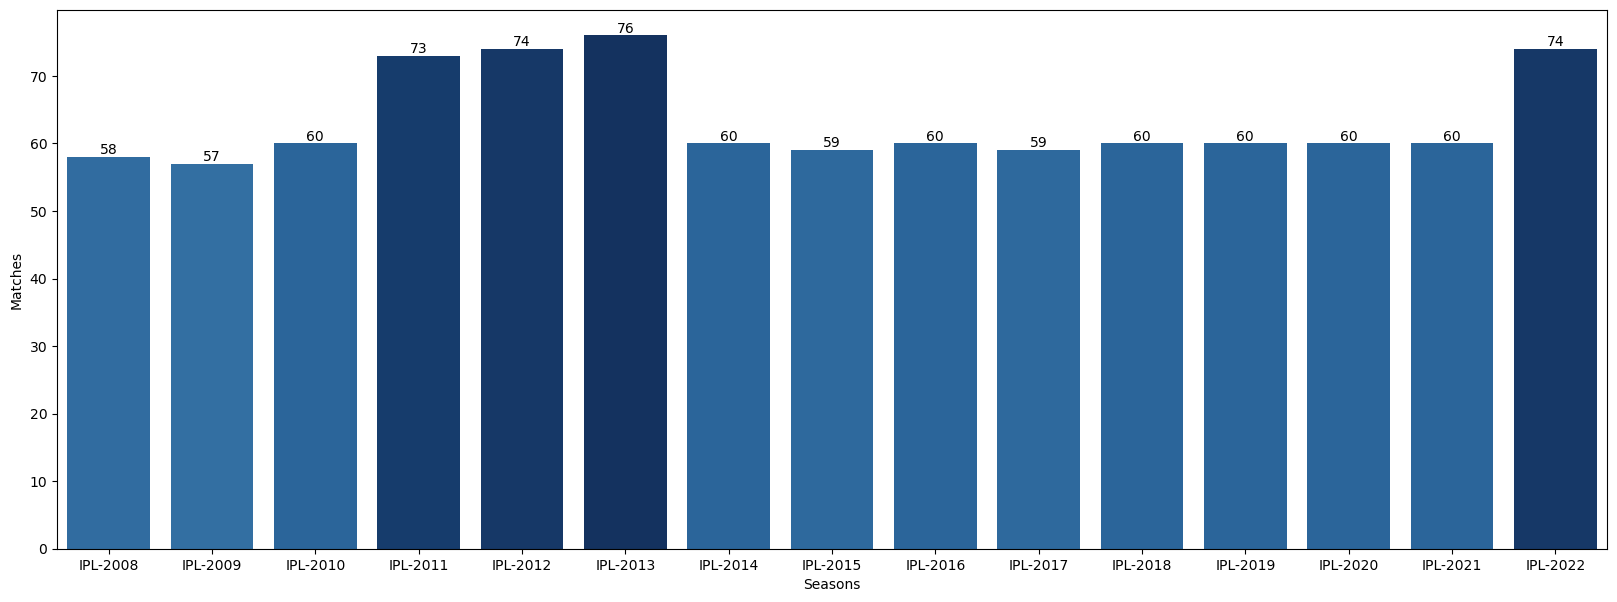

In [9]:
plt.rcParams["figure.figsize"] = (20,7)
cmap = cm.ScalarMappable(cmap='Blues')
cmap.set_clim(vmin=0, vmax=max(Matches_played['Matches']))

ax=sns.barplot(x=Matches_played['Seasons'],y=Matches_played['Matches'],palette=cmap.to_rgba(Matches_played['Matches']))
for i in ax.containers:
    ax.bar_label(i,)

# Total_Runs score In Each Season

In [10]:
runs_scrore_In_Seasons=df_Match_By_Match[['ID','Seasons']].merge(df_Ball_By_ball,left_on='ID',right_on='ID',how='right')
runs_scrore_In_Seasons.head()

,ID,Seasons,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,...,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Season,6's,4's
0,1312200,IPL-2022,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,...,0,0,0,NaN,NaN,NaN,Rajasthan Royals,IPL-2022,0,0
1,1312200,IPL-2022,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,...,1,0,0,NaN,NaN,NaN,Rajasthan Royals,IPL-2022,0,0
2,1312200,IPL-2022,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,...,1,0,0,NaN,NaN,NaN,Rajasthan Royals,IPL-2022,0,0
3,1312200,IPL-2022,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,...,0,0,0,NaN,NaN,NaN,Rajasthan Royals,IPL-2022,0,0
4,1312200,IPL-2022,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,...,0,0,0,NaN,NaN,NaN,Rajasthan Royals,IPL-2022,0,0


In [11]:
runs_per_season=runs_scrore_In_Seasons.groupby(['Seasons'])['total_run'].sum().reset_index()
runs_per_season['Avg_run']=runs_per_season['total_run']/Matches_played['Matches']
runs_per_season

,Seasons,total_run,Avg_run
0,IPL-2008,17937,309.258621
1,IPL-2009,16353,286.894737
2,IPL-2010,18883,314.716667
3,IPL-2011,21154,289.780822
4,IPL-2012,22453,303.418919
5,IPL-2013,22602,297.394737
6,IPL-2014,18931,315.516667
7,IPL-2015,18353,311.067797
8,IPL-2016,18862,314.366667
9,IPL-2017,18786,318.406780


# Total runs_ per_seasons

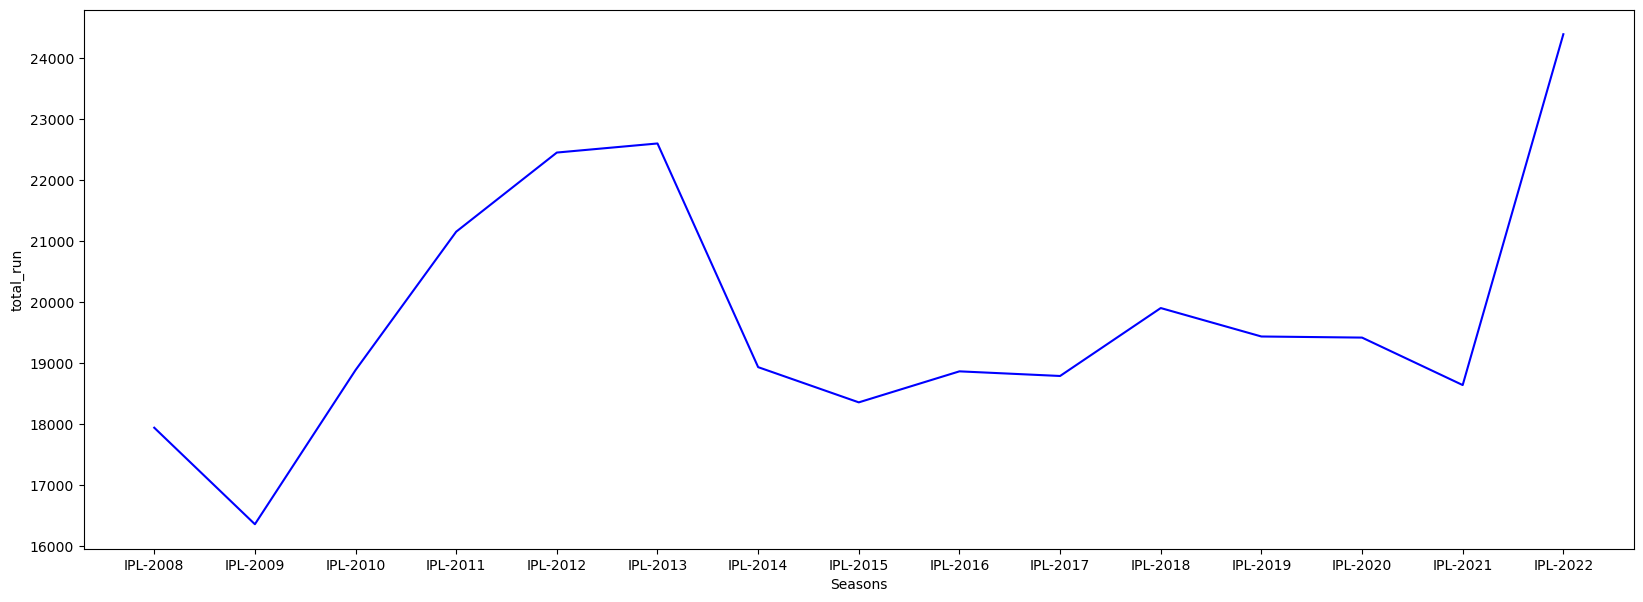

In [12]:
ax=sns.lineplot(data=runs_per_season, x=runs_per_season['Seasons'], y=runs_per_season['total_run'],color='blue')
for i in ax.containers:
    ax.bar_label(i,)

# Total Avg_runs_ per_seasons

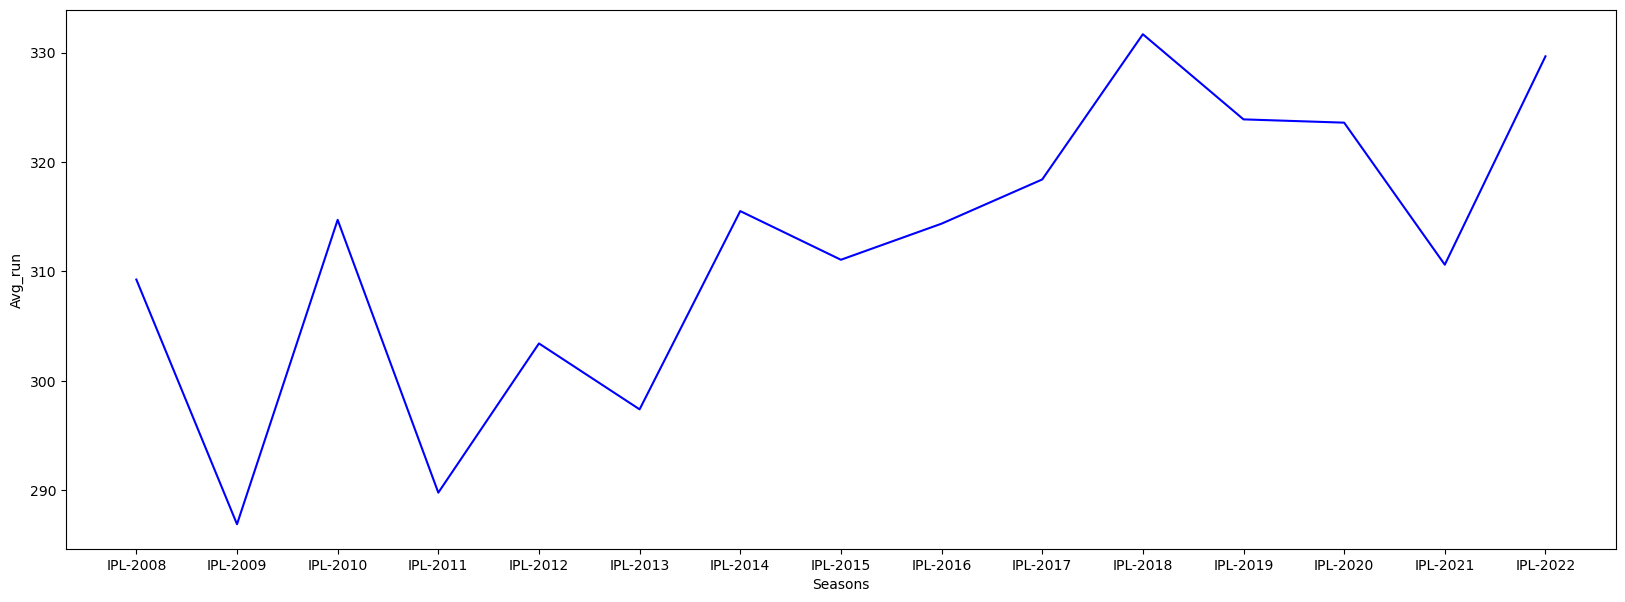

In [13]:
ax=sns.lineplot(data=runs_per_season, x=runs_per_season['Seasons'], y=runs_per_season['Avg_run'],color='blue')
for i in ax.containers:
    ax.bar_label(i,)

# #Top 10 highest Wicket Taker in all IPL


In [14]:

Bolwer_record=runs_scrore_In_Seasons[(runs_scrore_In_Seasons['kind']=='caught')|(runs_scrore_In_Seasons['kind']=='caught and bowled')|( runs_scrore_In_Seasons['kind']=='bowled')|( runs_scrore_In_Seasons['kind']=='stumped')|(runs_scrore_In_Seasons['kind']=='lbw')|(runs_scrore_In_Seasons['kind']=='hit wicket')].groupby(['bowler'])['isWicketDelivery'].sum().reset_index().rename(columns={'isWicketDelivery':'Wicket'})
Bolwer_record['Wicket']=Bolwer_record['Wicket'].astype(int)
Bolwer_records=Bolwer_record.sort_values(by='Wicket',ascending=False)

C:\Users\Mahima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



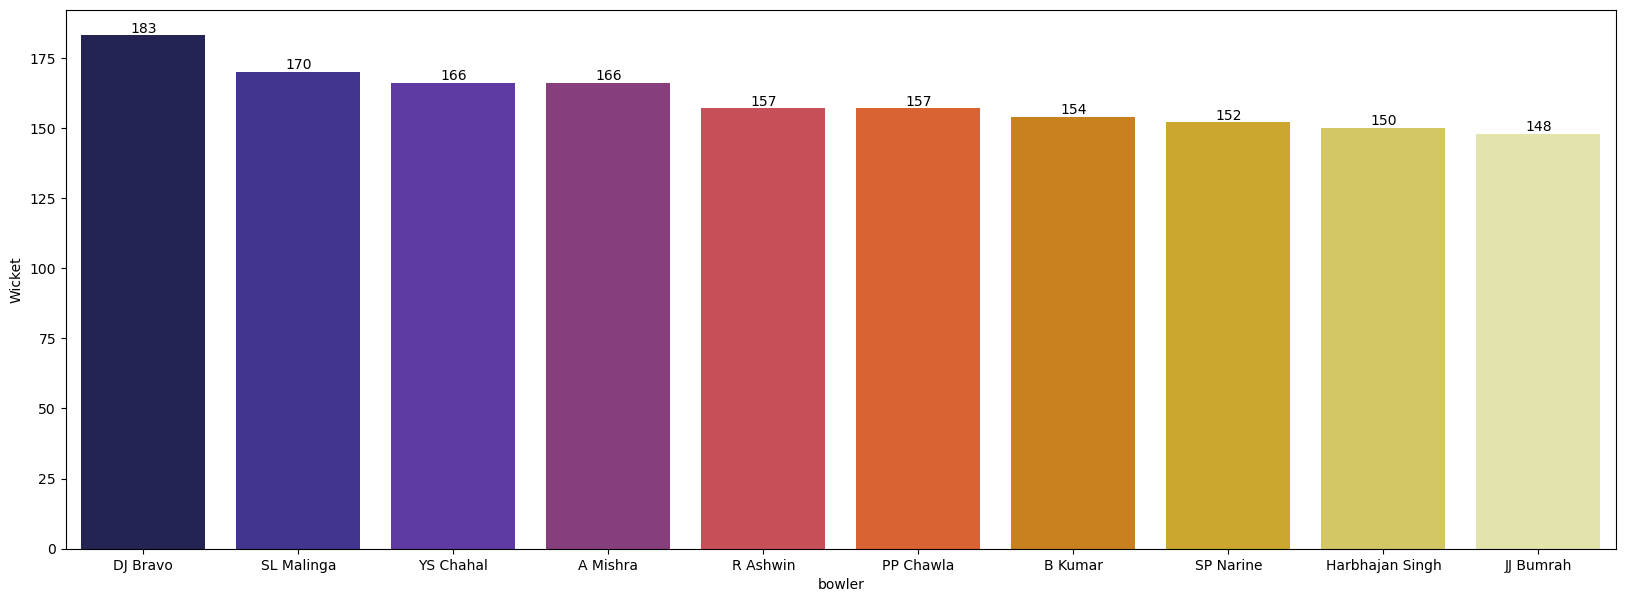

In [15]:
plt.rcParams["figure.figsize"] = (20,7)

ax=sns.barplot(Bolwer_records['bowler'][0:10],Bolwer_records['Wicket'][0:10],palette='CMRmap')
for i in ax.containers:
    ax.bar_label(i,)

In [57]:
batter_record=runs_scrore_In_Seasons.groupby(['batter'])['batsman_run'].sum().reset_index().rename(columns={'batsman_run':'Runs'})
batter_record['Runs']=batter_record['Runs'].astype(int)
Batter_records=batter_record.sort_values(by='Runs',ascending=False)

In [58]:
colors = ['turquoise',] * 13
colors[0] = 'crimson'
fig=px.bar(x=Batter_records['batter'][0:10],y=Batter_records['Runs'][0:10],labels=dict(x="Player",y="Total Runs"),)
fig.update_layout(title="Top 10 leading run-scrorer",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

In [19]:
temp_toss_diss_label=df_Match_By_Match.TossDecision.value_counts()
label=temp_toss_diss_label.index
values=temp_toss_diss_label.values
values

array([599, 351], dtype=int64)

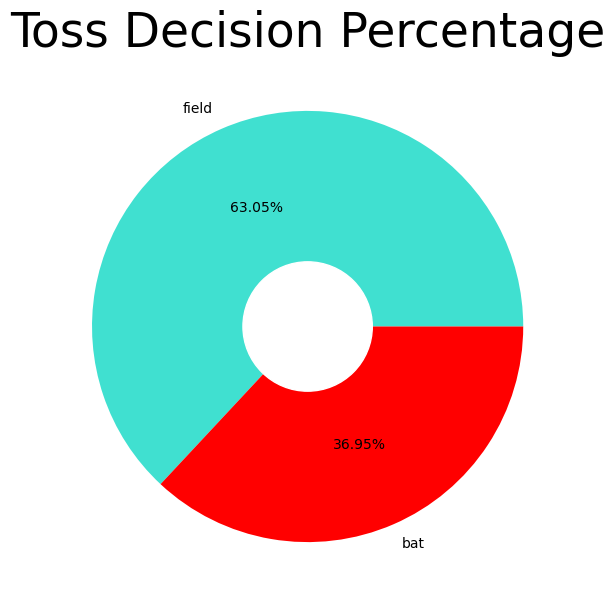

In [20]:
plt.pie(x=values,labels=label,autopct='%1.2f%%',colors=['turquoise','red'])
circle = plt.Circle( (0,0), 0.3, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Toss Decision Percentage',fontsize=34)
plt.show()
 

In [21]:
## Toss Based_Decision in All Seasion
Seasons_df=df_Match_By_Match.groupby(['Seasons','TossDecision'])['WinningTeam'].count().reset_index()
Seasons_df


,Seasons,TossDecision,WinningTeam
0,IPL-2008,bat,26
1,IPL-2008,field,32
2,IPL-2009,bat,35
3,IPL-2009,field,22
4,IPL-2010,bat,39
5,IPL-2010,field,21
6,IPL-2011,bat,25
7,IPL-2011,field,48
8,IPL-2012,bat,37
9,IPL-2012,field,37


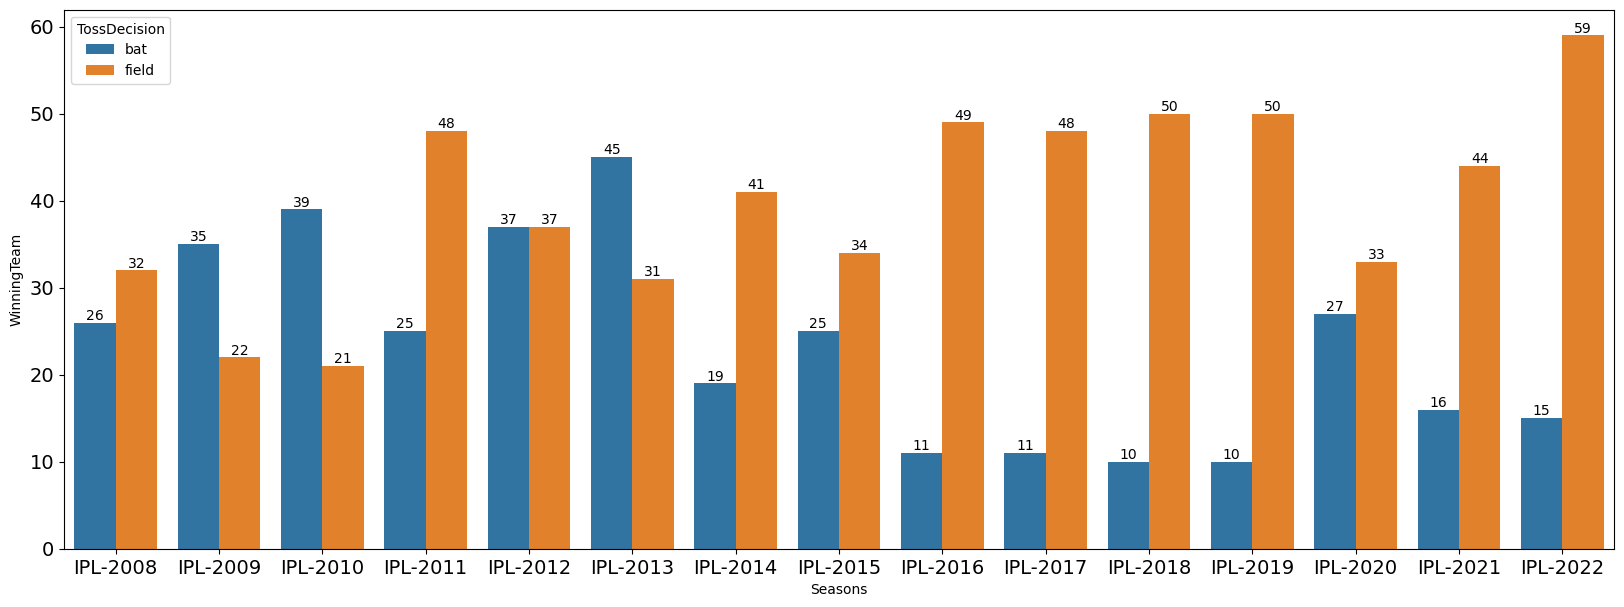

In [22]:
ax=sns.barplot(data=Seasons_df,x='Seasons',y='WinningTeam',hue='TossDecision')
ax.tick_params(axis='both', labelsize=14)
for i in ax.containers:
    ax.bar_label(i,label_type='edge')

In [23]:
df_Match_By_Match['toss_win_game_win'] = np.where((df_Match_By_Match.TossWinner == df_Match_By_Match.WinningTeam),'Yes','No')
df_Match_By_Match.head()

,ID,Country,City,Seasons,Date,MatchNumber,Team1,Team2,Venue,TossWinner,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,toss_win_game_win
0,1312200,India,Ahmedabad,IPL-2022,29/05/2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,No
1,1312199,India,Ahmedabad,IPL-2022,27/05/2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,Yes
2,1312198,India,Kolkata,IPL-2022,25/05/2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,No
3,1312197,India,Kolkata,IPL-2022,24/05/2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,Yes
4,1304116,India,Mumbai,IPL-2022,22/05/2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,No


In [24]:
label=df_Match_By_Match['toss_win_game_win'].value_counts().index
value=df_Match_By_Match['toss_win_game_win'].value_counts().values


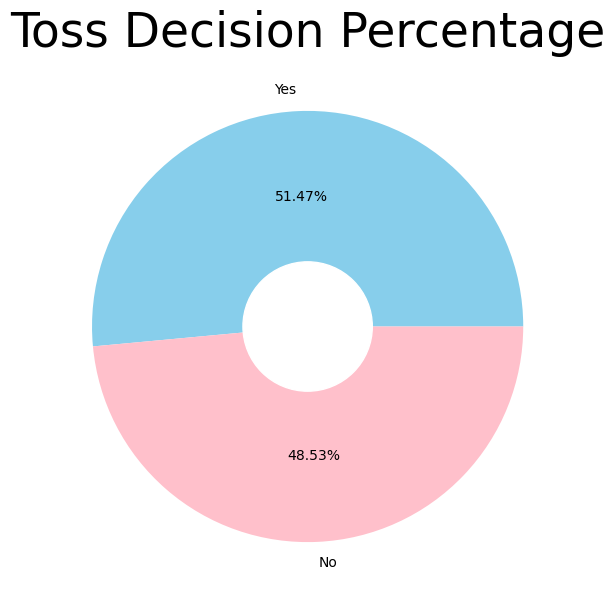

In [25]:
plt.pie(x=value,labels=label,autopct='%1.2f%%',colors=['skyblue','pink'])
circle = plt.Circle( (0,0), 0.3,color='White')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Toss Decision Percentage',fontsize=34)
plt.show()

In [26]:
Winner=df_Match_By_Match.groupby('WinningTeam')['ID'].count().reset_index().rename(columns={'ID':'Winning'}).sort_values('Winning',ascending=False)

Text(0.5, 1.0, 'Winning Record For All Team 2008-2022')

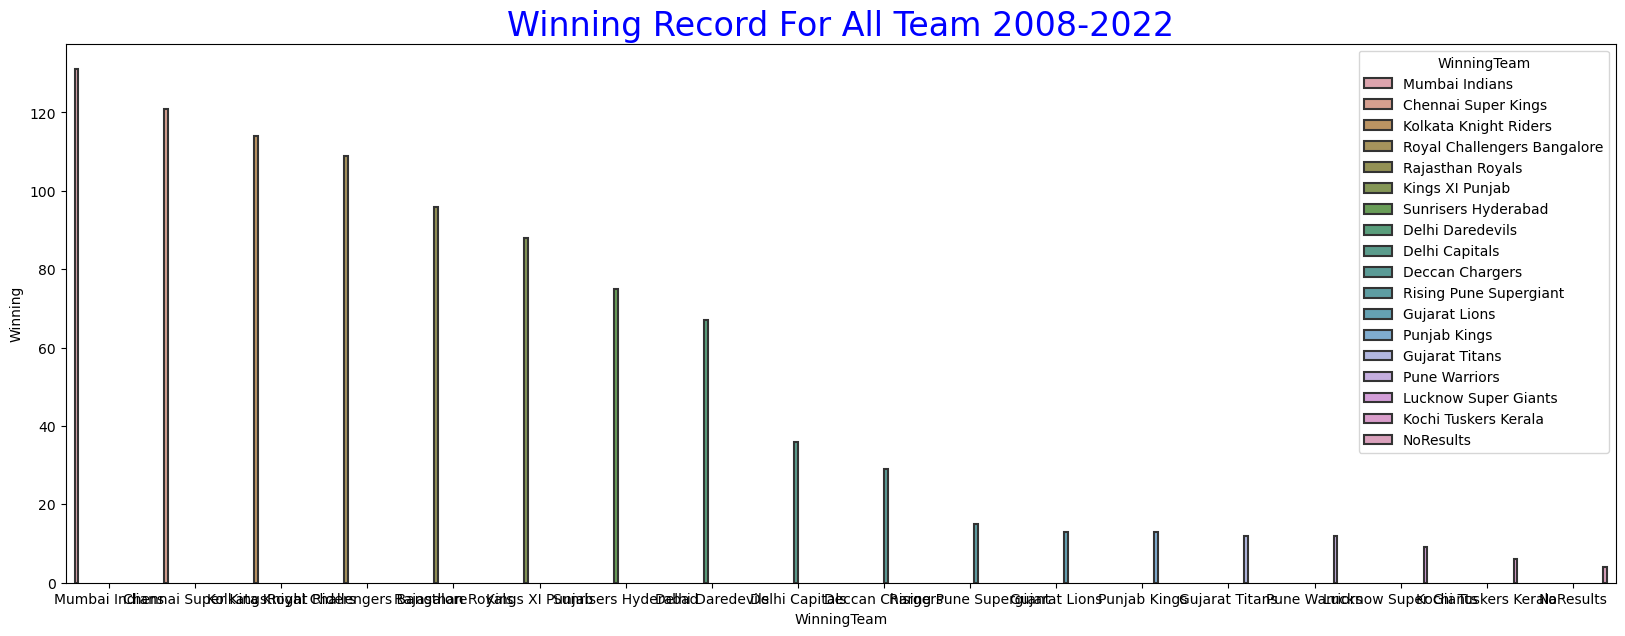

In [27]:
plt.rcParams["figure.figsize"] = (20,7)
sns.barplot(x=Winner['WinningTeam'],y=Winner['Winning'],hue=Winner['WinningTeam'] ,saturation=.5, ci=None,errwidth=1.5,capsize=.1,linewidth=1.5,edgecolor=".2")
ax.tick_params(axis='both', labelsize=14)

plt.title('Winning Record For All Team 2008-2022',fontsize='24',color='Blue')

In [28]:
Venue_df=df_Match_By_Match.groupby('Venue')['ID'].count().reset_index().rename(columns={'ID':'Matches_Hosted'}).sort_values('Matches_Hosted',ascending=False)

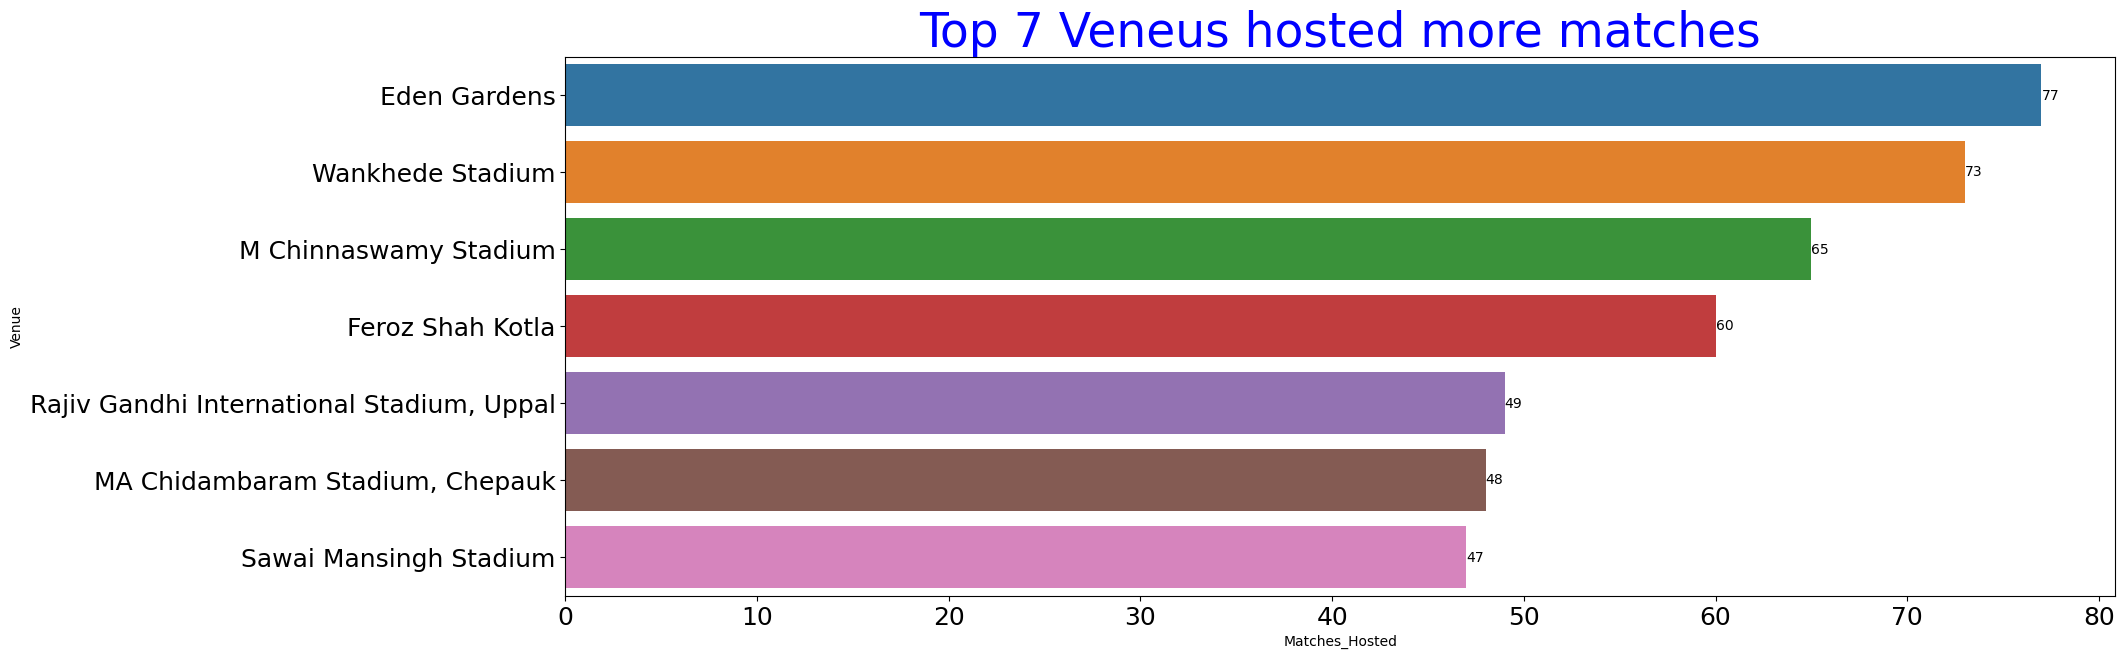

In [29]:
text_kwargs={'color':'white','fontsize':18}
plt.title('Top 7 Veneus hosted more matches',fontsize=34,color='Blue')
ax=sns.barplot(x=Venue_df['Matches_Hosted'],y=Venue_df['Venue'][:7])
ax.tick_params(axis='both', labelsize=18)

for i in ax.containers:
    ax.bar_label(i,)

In [30]:
Final_DF=df_Match_By_Match[df_Match_By_Match['MatchNumber']=='Final']

In [31]:
Champion=Final_DF['WinningTeam'].value_counts().index
Champion_times=Final_DF['WinningTeam'].value_counts().values
colors=['skyblue','#F6BE00' ,'purple','blue','orange','#000080','pink']

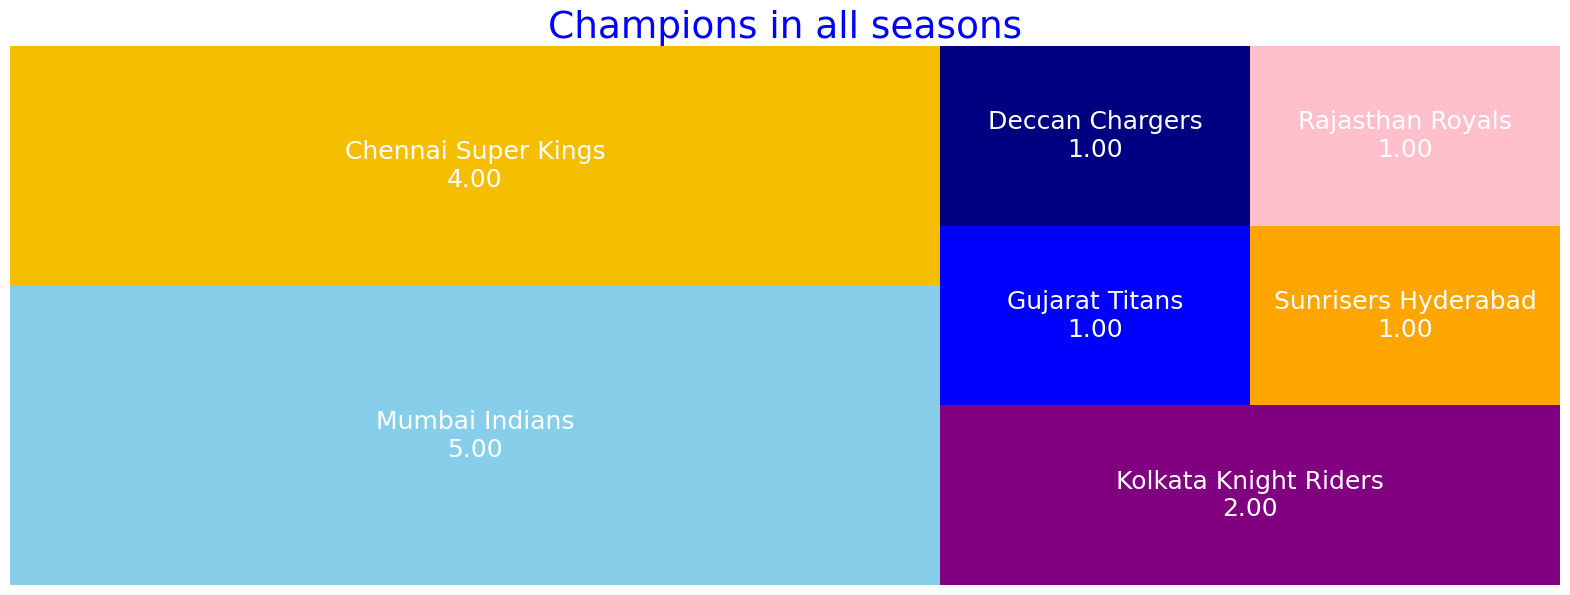

In [32]:
text_kwargs={'color':'blue','color':'white','fontsize':18}
labels = ["%s\n%.2f" % (label) for label in zip(Champion, Champion_times)]
squarify.plot(sizes=Champion_times,label=labels,color=colors,text_kwargs=text_kwargs)

plt.title('Champions in all seasons',fontsize=27,color='Blue')
plt.axis('off')
plt.show()

# Most 4's In Ipl Data Analytics


In [33]:
Boundry=df_Ball_By_ball[df_Ball_By_ball["4's"]==1].groupby('batter')["4's"].sum().reset_index().sort_values("4's",ascending=False)

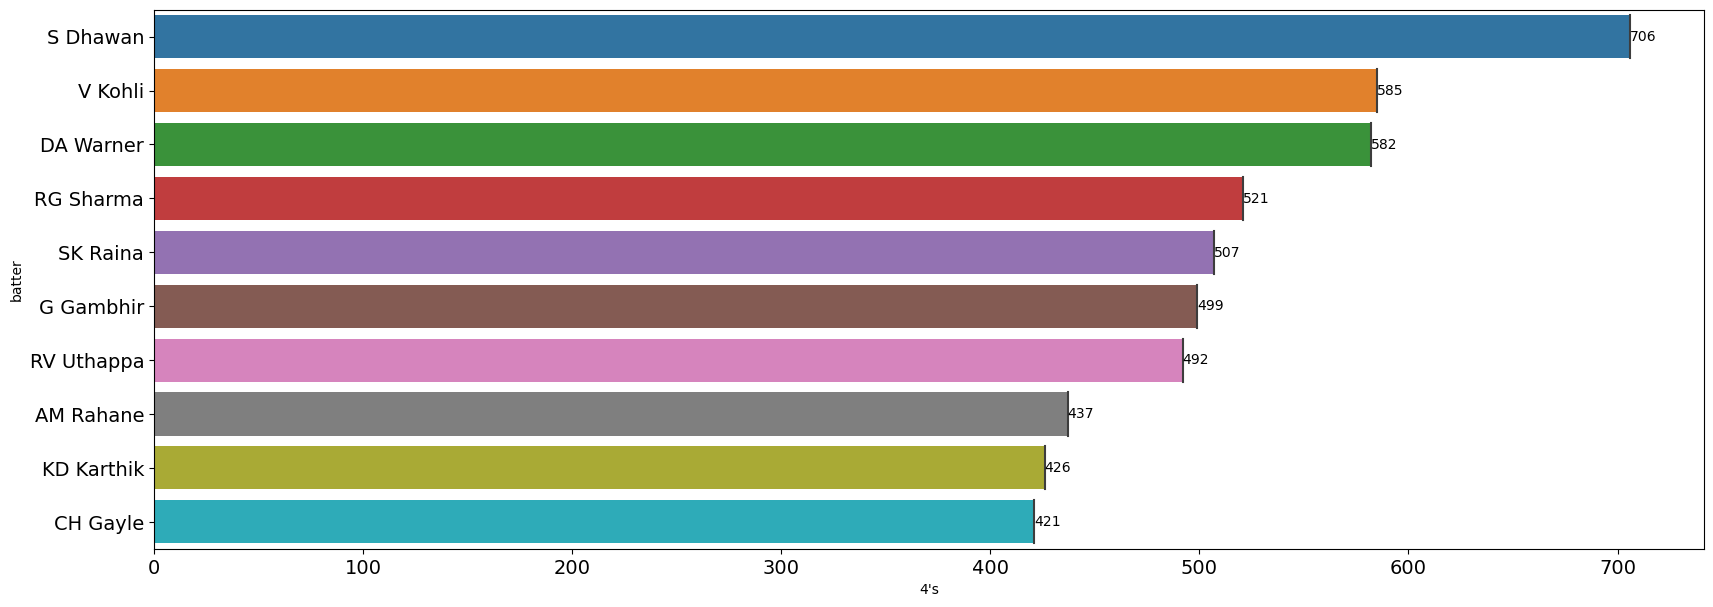

In [34]:
sns.violinplot(x=Boundry["4's"],y=Boundry['batter'][:10],data=Boundry)
ax=sns.barplot(x=Boundry["4's"],y=Boundry['batter'][:10],data=Boundry)
ax.tick_params(axis='both', labelsize=14)

for i in ax.containers:
    ax.bar_label(i,)

 # Most 6's In Ipl Data Analytics


In [35]:
Sixer=df_Ball_By_ball[df_Ball_By_ball["6's"]==1].groupby('batter')["6's"].sum().reset_index().sort_values("6's",ascending=False)
Sixer

,batter,6's
71,CH Gayle,354
13,AB de Villiers,250
289,RG Sharma,239
227,MS Dhoni,226
163,KA Pollard,221
...,...,...
95,DJ Malan,1
242,NK Patel,1
328,SK Trivedi,1
243,NL McCullum,1


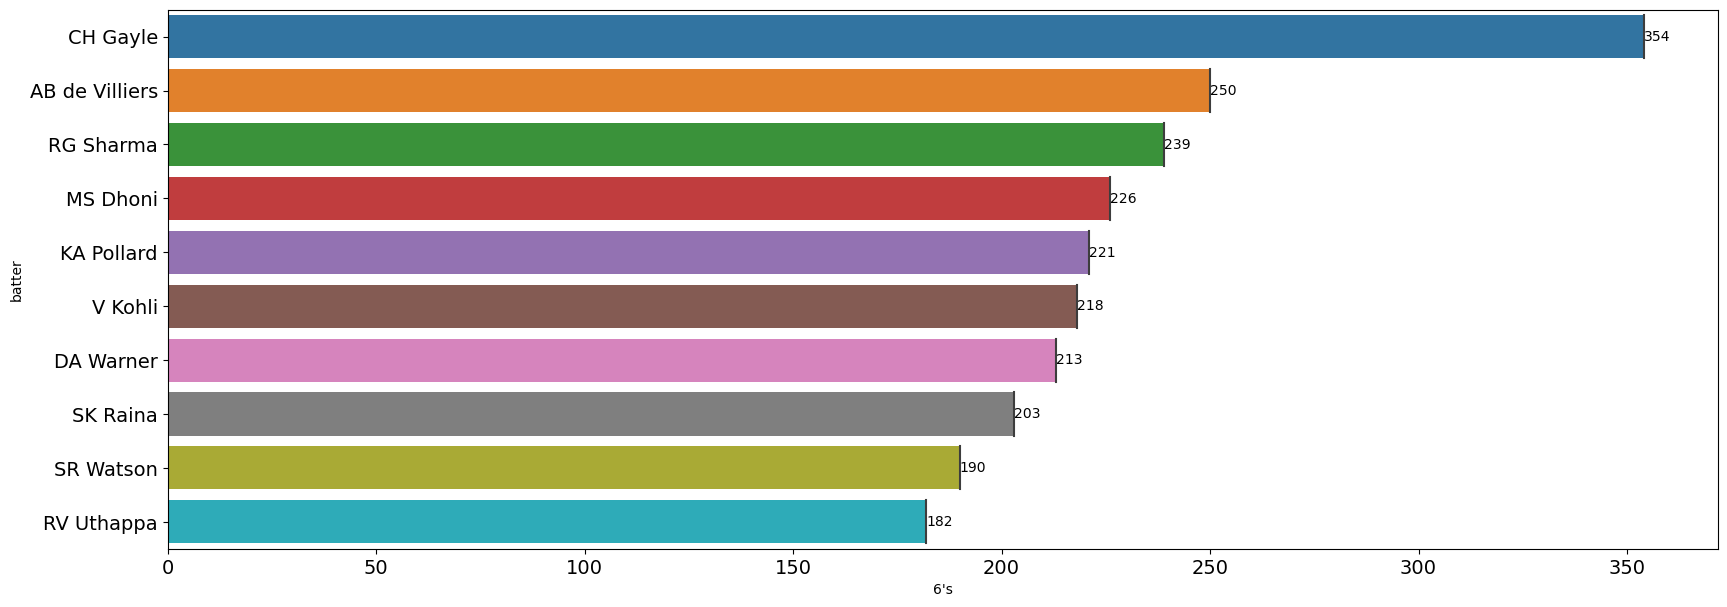

In [36]:
sns.violinplot(x=Sixer["6's"],y=Sixer['batter'][:10],data=Sixer)
ax=sns.barplot(x=Sixer["6's"],y=Sixer['batter'][:10],data=Sixer)
ax.tick_params(axis='both', labelsize=14)

for i in ax.containers:
    ax.bar_label(i,)

# Batsmen Wise Stats

In [38]:
df_Ball_By_ball

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Season,6's,4's
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,IPL-2022,0,0
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,IPL-2022,0,0
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,IPL-2022,0,0
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,IPL-2022,0,0
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,IPL-2022,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,IPL-2008,0,0
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,IPL-2008,0,0
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,IPL-2008,0,0
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,IPL-2008,0,0


In [37]:
Batsmen=input()


MS Dhoni


In [38]:
Batsmen_Data=df_Ball_By_ball[df_Ball_By_ball['batter']==Batsmen]
Strike_Rate=(Batsmen_Data['batsman_run'].sum()/Batsmen_Data['ballnumber'].count())*100
Total_Run=Batsmen_Data['batsman_run'].sum()
Total_Fours=Batsmen_Data["4's"].sum()
Total_Six=Batsmen_Data["6's"].sum()
Team=Batsmen_Data['BattingTeam'].unique()
Total_Matches_Played=len(pd.unique(Batsmen_Data['ID']))
print("Matches Played:",Total_Matches_Played)
print('Total Runs:',Total_Run)
print('Strike_Rate: ',Strike_Rate)
print('Total_Fours:',Total_Fours)
print('Total_Six:',Total_Six)
print('Team')
print(Team)


Batsmen_Data.head()


Matches Played: 205
Total Runs: 4978
Strike_Rate:  130.93108890057866
Total_Fours: 350
Total_Six: 226
Team
['Chennai Super Kings' 'Rising Pune Supergiant' 'Rising Pune Supergiants']


,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,Season,6's,4's
1508,1304114,1,10,3,MS Dhoni,YS Chahal,MM Ali,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings,IPL-2022,0,0
1509,1304114,1,10,4,MS Dhoni,YS Chahal,MM Ali,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings,IPL-2022,0,0
1510,1304114,1,10,5,MS Dhoni,YS Chahal,MM Ali,NaN,0,0,0,0,0,NaN,NaN,NaN,Chennai Super Kings,IPL-2022,0,0
1511,1304114,1,10,6,MS Dhoni,YS Chahal,MM Ali,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings,IPL-2022,0,0
1512,1304114,1,11,1,MS Dhoni,TA Boult,MM Ali,NaN,1,0,1,0,0,NaN,NaN,NaN,Chennai Super Kings,IPL-2022,0,0


In [39]:
from tkinter import *
top=Tk()
# create listbox object
listbox = Listbox(top, height = 50,
                  width = 90,
                  bg = "Black",
                  activestyle = 'dotbox',
                  font = "Helvetica",
                  fg = "White")
 
# Define the size of the window.

top.geometry("600x650") 
 
 
Batsmen_Data=df_Ball_By_ball[df_Ball_By_ball['batter']==Batsmen]
Total_Matches_Played=len(pd.unique(Batsmen_Data['ID']))
Strike_Rate=(Batsmen_Data['batsman_run'].sum()/Batsmen_Data['ballnumber'].count())*100
Total_Run=Batsmen_Data['batsman_run'].sum()
Total_Fours=Batsmen_Data["4's"].sum()
Total_Six=Batsmen_Data["6's"].sum()
Team=Batsmen_Data['BattingTeam'].unique()


# Create a card with some data[]
label = Label(top, text =Batsmen)
listbox.insert(1,{'Total_Matches_Played':Total_Matches_Played})


listbox.insert(2,{'Total_Run':Total_Run})
listbox.insert(3,{'Strike_Rate':Strike_Rate})
listbox.insert(4,{'Total_Fours':Total_Fours})
listbox.insert(5,{'Total_Six':Total_Six})
listbox.insert(6,{'Teams':Team})







# pack the widgets
label.pack()
listbox.pack()
 
 

top.mainloop()


# # Top 10 BatsMen With Strke Rate

In [66]:
strike_Rate1=df_Ball_By_ball


In [98]:
Strike_Rate=(strike_Rate1.groupby(['batter'])['batsman_run'].sum()/strike_Rate1.groupby('batter')['ballnumber'].count())*100

Striker_rate2=Strike_Rate.reset_index().rename(columns={0:'strike Rate'}).sort_values("strike Rate",ascending=False)[:10]
Striker_rate2

,batter,strike Rate
393,PN Mankad,400.000000
83,B Stanlake,250.000000
567,Umar Gul,205.263158
448,RS Sodhi,200.000000
551,TH David,198.936170
526,Shahid Afridi,176.086957
560,TU Deshpande,175.000000
200,I Malhotra,175.000000
287,LJ Wright,168.253968
36,AD Russell,168.234323


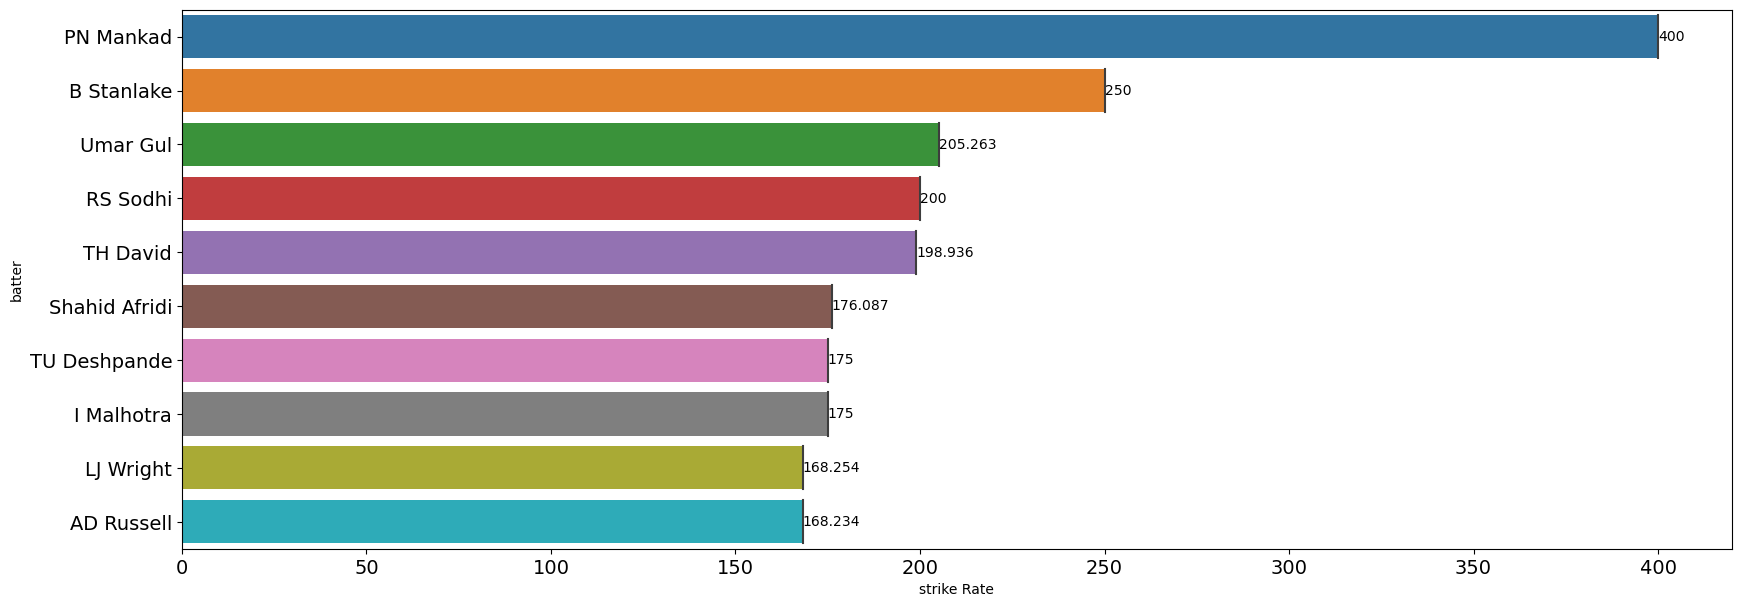

In [99]:
sns.violinplot(x=Striker_rate2["strike Rate"],y=Striker_rate2['batter'],data=Striker_rate2)
ax=sns.barplot(x=Striker_rate2["strike Rate"],y=Striker_rate2['batter'],data=Striker_rate2)
ax.tick_params(axis='both', labelsize=14)

for i in ax.containers:
    ax.bar_label(i,)

In [86]:
Avg_Rate=df_Ball_By_ball
Avg_Rate=Avg_Rate[Avg_Rate['player_out'].isna()==False]
Batting_Avg=strike_Rate1.groupby(['batter'])['batsman_run'].sum()/Avg_Rate.groupby(['batter'])['player_out'].count()

In [91]:
Batting_Avg=Batting_Avg.reset_index().rename(columns={0:'Batting_Avg'}).sort_values("Batting_Avg",ascending=False)[0:10]

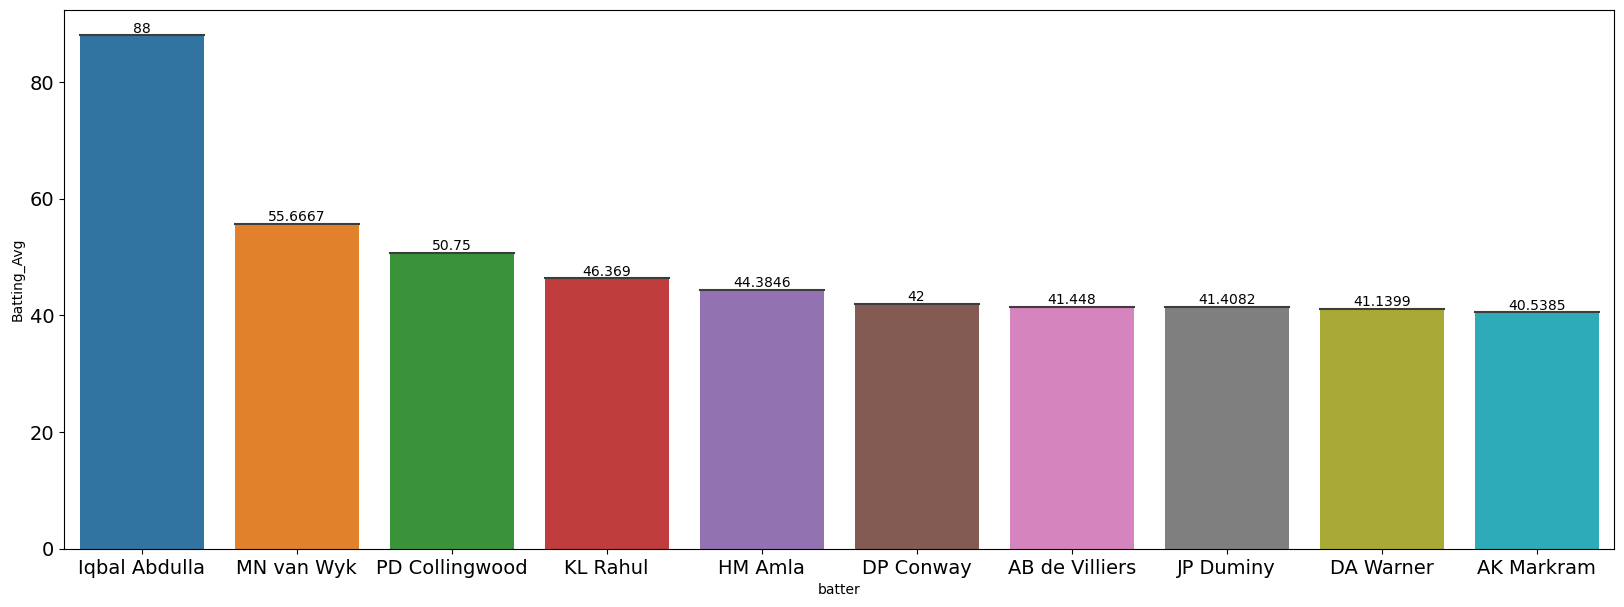

In [94]:
plt.rcParams["figure.figsize"] = (20,7)
sns.violinplot(x=Batting_Avg["batter"],y=Batting_Avg['Batting_Avg'],data=Batting_Avg)
ax=sns.barplot(x=Batting_Avg["batter"],y=Batting_Avg['Batting_Avg'],data=Batting_Avg)
ax.tick_params(axis='both', labelsize=14)
for i in ax.containers:
    ax.bar_label(i,)